In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from scipy.stats import skew

IMPORT NECESSARY LIBRARIES AND FUNCTIONS

In [2]:
df=pd.read_csv("C:\\Users\\manso\\OneDrive\\Desktop\\Pune house data.csv")
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [3]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [4]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [5]:
df.bath[df['bath'].isna()]=df.size
df.bath.isnull().sum()

C:\Users\manso\AppData\Local\Temp/ipykernel_13780/2326409159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bath[df['bath'].isna()]=df.size


0

In [ ]:
ASSUMPTION: FILLINGG THE BATHS BASED ON THE SIZE

In [6]:
df.shape

(13320, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13320 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


we can see that the data needs to be cleaned 
1) For balcony and bath we assume that na values to be zero 


In [8]:
df.fillna({
    "balcony" : 0,
    
},inplace=True)

In [9]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath                0
balcony             0
price               0
site_location       1
dtype: int64

In [10]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [11]:
len(df.site_location.unique())

98

we a lot of data missing in society so we can drop this column

In [12]:
df=df.drop(['society','availability'], axis='columns')
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [13]:
df.isnull().sum()

area_type         0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

now we can drop the null values using dropna

In [14]:
df=df.dropna()
df.isnull().sum()

area_type        0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

now our data is clean

In [15]:
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [16]:
df.describe()

,bath,balcony,price
count,13303.000000,13303.000000,13303.000000
mean,516.336691,1.513869,112.587867
std,7830.392318,0.863099,148.992480
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,119880.000000,3.000000,3600.000000


In [17]:
df.replace({"size" : '[A-Za-z]'} ,' ', regex= True, inplace=True)
df['size']=df['size'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13303 non-null  object 
 1   size           13303 non-null  int32  
 2   total_sqft     13303 non-null  object 
 3   bath           13303 non-null  float64
 4   balcony        13303 non-null  float64
 5   price          13303 non-null  float64
 6   site_location  13303 non-null  object 
dtypes: float64(3), int32(1), object(3)
memory usage: 779.5+ KB


In [18]:
len(df.total_sqft.unique())

2110

In [19]:
df.replace({"total_sqft" : '[A-Za-z]'} ,' ', regex= True, inplace=True)

In [20]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(isFloat)]

,area_type,size,total_sqft,bath,balcony,price,site_location
30,Super built-up Area,4,2100 - 2850,4.0,0.0,186.000,Gultekdi
56,Built-up Area,4,3010 - 3410,119880.0,0.0,192.000,Model colony
81,Built-up Area,4,2957 - 3450,119880.0,0.0,224.500,Shukrawar Peth
122,Super built-up Area,4,3067 - 8156,4.0,0.0,477.000,Ganeshkhind
137,Super built-up Area,2,1042 - 1105,2.0,0.0,54.005,Khadaki
...,...,...,...,...,...,...,...
12990,Super built-up Area,3,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar
13059,Super built-up Area,2,1200 - 1470,2.0,0.0,72.760,Anandnagar
13240,Super built-up Area,1,1020 - 1130,119880.0,0.0,52.570,Vadgaon Budruk
13265,Super built-up Area,2,1133 - 1384,2.0,0.0,59.135,Dapodi


In [21]:
def to_float(x):
    n=str(x).split('-')
    if len(n)==2:
        return (float(n[0])+float(n[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df.total_sqft=df.total_sqft.apply(to_float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13303 non-null  object 
 1   size           13303 non-null  int32  
 2   total_sqft     13271 non-null  float64
 3   bath           13303 non-null  float64
 4   balcony        13303 non-null  float64
 5   price          13303 non-null  float64
 6   site_location  13303 non-null  object 
dtypes: float64(4), int32(1), object(2)
memory usage: 779.5+ KB


In [24]:
df.site_location.value_counts()

Alandi Road             139
Mangalwar peth          139
Jangali Maharaj Road    139
Kalyani Nagar           139
Karve Nagar             139
                       ... 
Sahakar Nagar           137
Warje                   137
Yerawada                137
Satara Road             137
other                     1
Name: site_location, Length: 97, dtype: int64

In [25]:
df['price_per_sqft']=df.price/df.total_sqft

In [26]:
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Super built-up Area,2,1056.0,2.0,1.0,39.07,Alandi Road,0.036998
1,Plot Area,4,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0.046154
2,Built-up Area,3,1440.0,2.0,3.0,62.00,Anandnagar,0.043056
3,Super built-up Area,3,1521.0,3.0,1.0,95.00,Aundh,0.062459
4,Super built-up Area,2,1200.0,2.0,1.0,51.00,Aundh Road,0.042500


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13303 non-null  object 
 1   size            13303 non-null  int32  
 2   total_sqft      13271 non-null  float64
 3   bath            13303 non-null  float64
 4   balcony         13303 non-null  float64
 5   price           13303 non-null  float64
 6   site_location   13303 non-null  object 
 7   price_per_sqft  13271 non-null  float64
dtypes: float64(5), int32(1), object(2)
memory usage: 883.4+ KB


In [28]:
df.isnull().sum()

area_type          0
size               0
total_sqft        32
bath               0
balcony            0
price              0
site_location      0
price_per_sqft    32
dtype: int64

In [29]:
df=df.dropna()

In [30]:
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Super built-up Area,2,1056.0,2.0,1.0,39.07,Alandi Road,0.036998
1,Plot Area,4,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0.046154
2,Built-up Area,3,1440.0,2.0,3.0,62.00,Anandnagar,0.043056
3,Super built-up Area,3,1521.0,3.0,1.0,95.00,Aundh,0.062459
4,Super built-up Area,2,1200.0,2.0,1.0,51.00,Aundh Road,0.042500


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13271 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13271 non-null  object 
 1   size            13271 non-null  int32  
 2   total_sqft      13271 non-null  float64
 3   bath            13271 non-null  float64
 4   balcony         13271 non-null  float64
 5   price           13271 non-null  float64
 6   site_location   13271 non-null  object 
 7   price_per_sqft  13271 non-null  float64
dtypes: float64(5), int32(1), object(2)
memory usage: 881.3+ KB


C:\Users\manso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


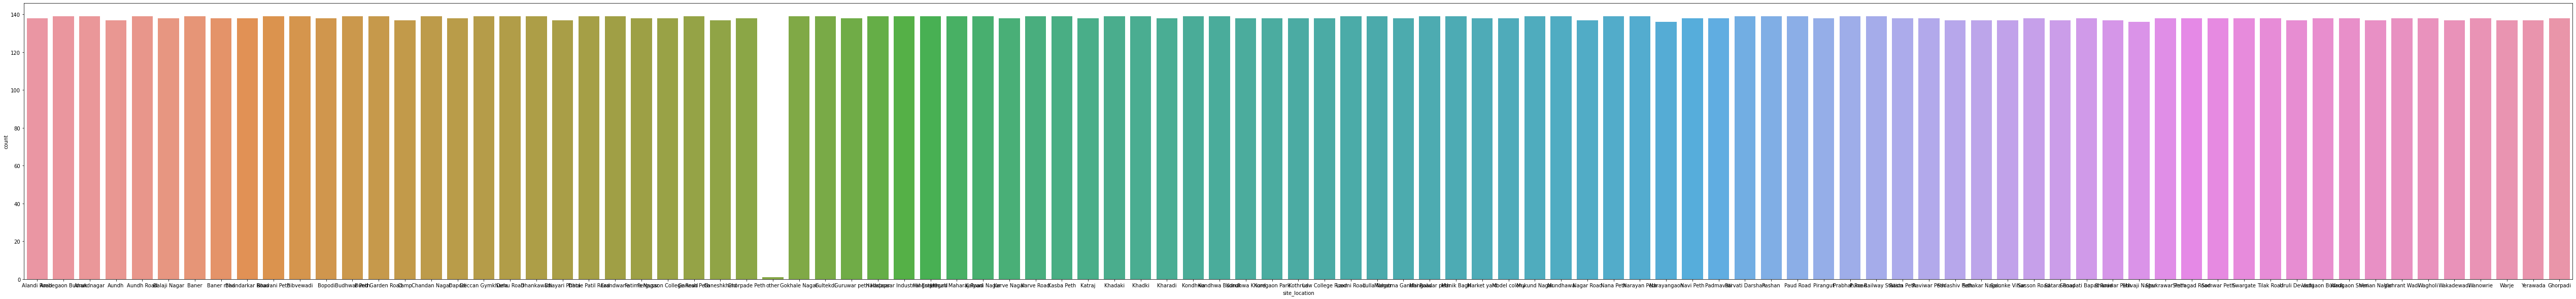

In [32]:
plt.figure(figsize=(90, 10))
sns.countplot(df.site_location)
plt.show()

area_type


C:\Users\manso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


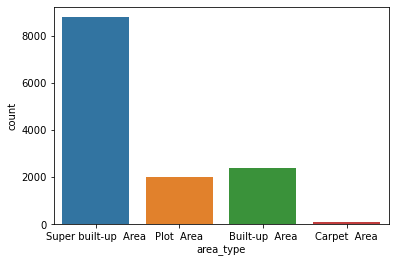

size


C:\Users\manso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


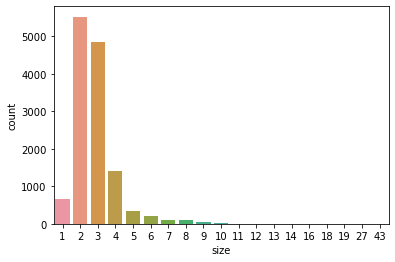

C:\Users\manso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


bath


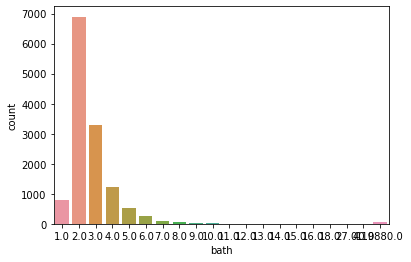

C:\Users\manso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


balcony


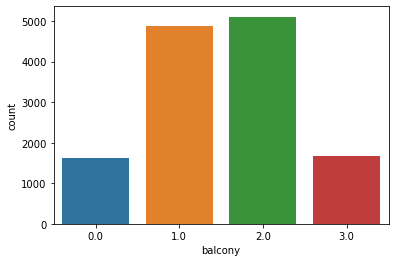

In [33]:
cols=["area_type","size","bath","balcony"]
for cols in cols:
    print(cols)
    sns.countplot(df[cols])
    plt.show()

C:\Users\manso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


size
4.833658009166701


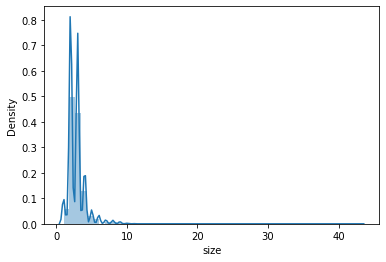

total_sqft
15.252380081129953


C:\Users\manso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


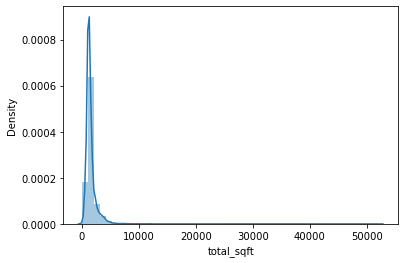

bath
15.160107346558219


C:\Users\manso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


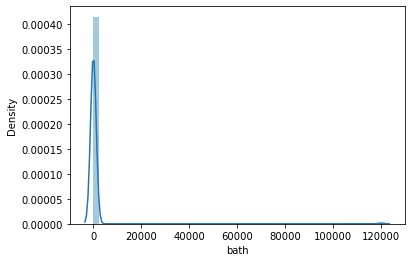

balcony
-0.025787884300061382


C:\Users\manso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


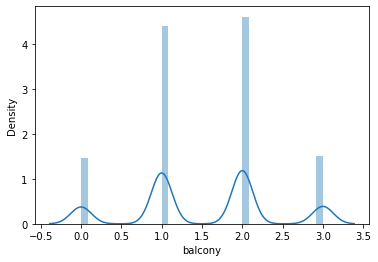

price
8.072619585738753


C:\Users\manso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


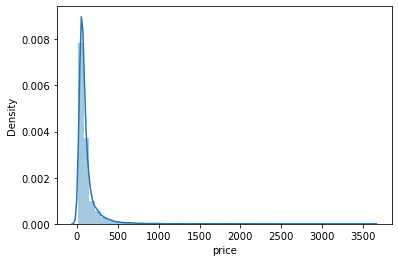

In [34]:
cols_n=["size","total_sqft","bath","balcony","price"]
for cols_n in cols_n:
    print(cols_n)
    print(skew(df[cols_n]))
    sns.distplot(df[cols_n])
    plt.show()

<AxesSubplot:>

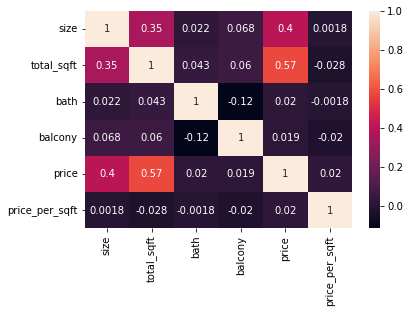

In [35]:
sns.heatmap(df.corr(), annot=True)

balcony has very low correlation with the price

Now according to each area we will detect the outliers

In [36]:
def boxplot_n(df):
    for key, subdf in df.groupby('site_location'):
        print(key)
        print(sns.boxplot(x=subdf.price_per_sqft, data=subdf))
        plt.show()

Alandi Road
AxesSubplot(0.125,0.125;0.775x0.755)


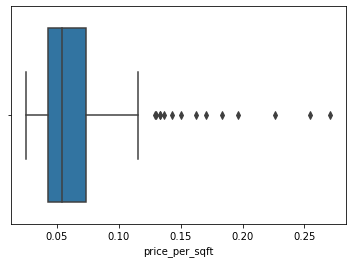

Ambegaon Budruk
AxesSubplot(0.125,0.125;0.775x0.755)


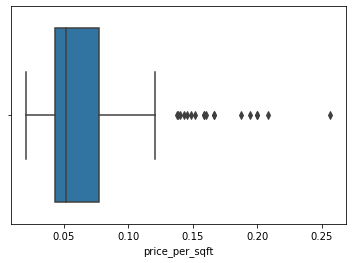

Anandnagar
AxesSubplot(0.125,0.125;0.775x0.755)


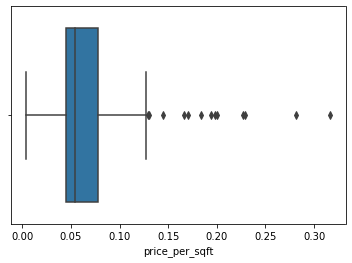

Aundh
AxesSubplot(0.125,0.125;0.775x0.755)


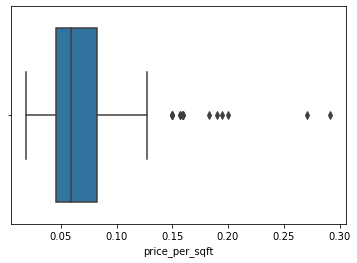

Aundh Road
AxesSubplot(0.125,0.125;0.775x0.755)


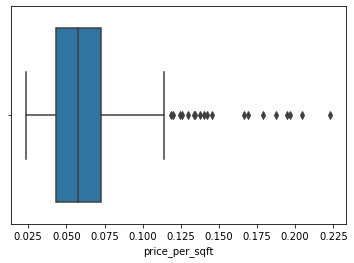

Balaji Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


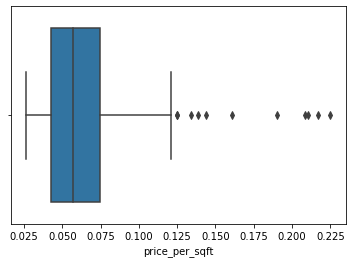

Baner
AxesSubplot(0.125,0.125;0.775x0.755)


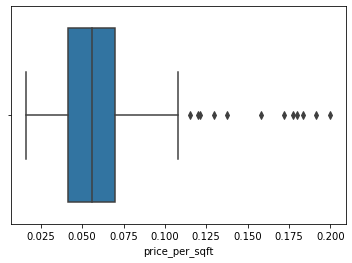

Baner road
AxesSubplot(0.125,0.125;0.775x0.755)


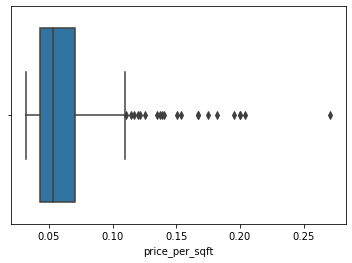

Bhandarkar Road
AxesSubplot(0.125,0.125;0.775x0.755)


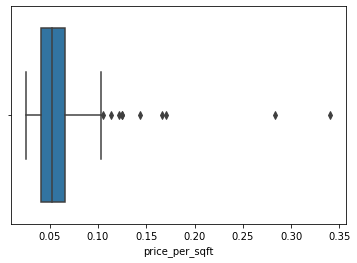

Bhavani Peth
AxesSubplot(0.125,0.125;0.775x0.755)


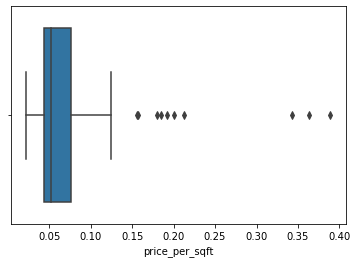

Bibvewadi
AxesSubplot(0.125,0.125;0.775x0.755)


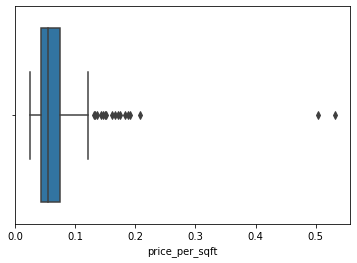

Bopodi
AxesSubplot(0.125,0.125;0.775x0.755)


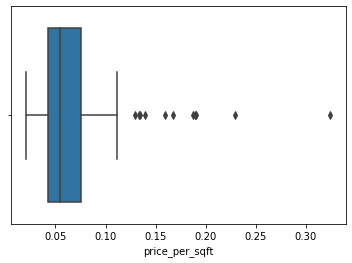

Budhwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


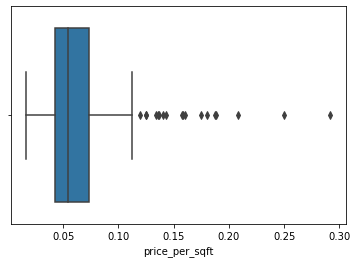

Bund Garden Road
AxesSubplot(0.125,0.125;0.775x0.755)


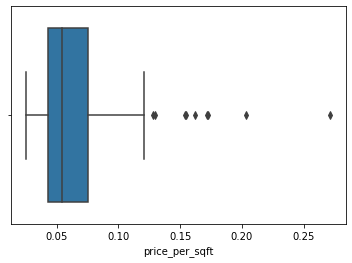

Camp
AxesSubplot(0.125,0.125;0.775x0.755)


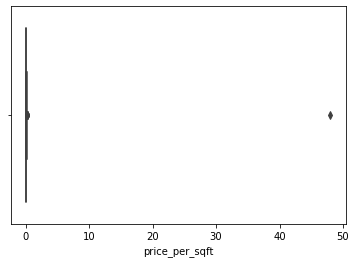

Chandan Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


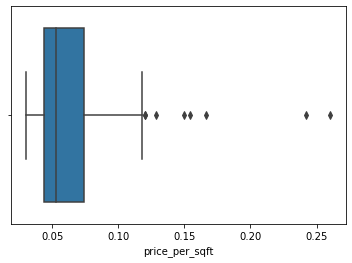

Dapodi
AxesSubplot(0.125,0.125;0.775x0.755)


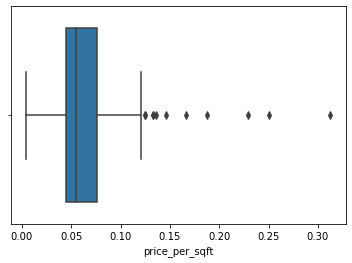

Deccan Gymkhana
AxesSubplot(0.125,0.125;0.775x0.755)


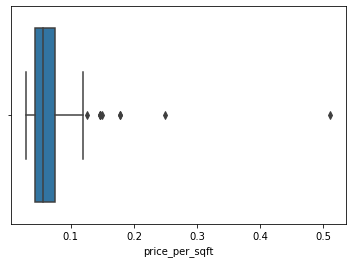

Dehu Road
AxesSubplot(0.125,0.125;0.775x0.755)


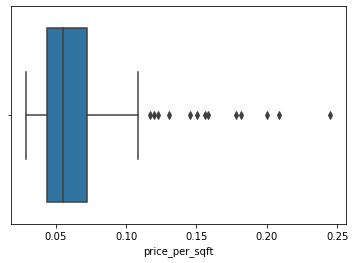

Dhankawadi
AxesSubplot(0.125,0.125;0.775x0.755)


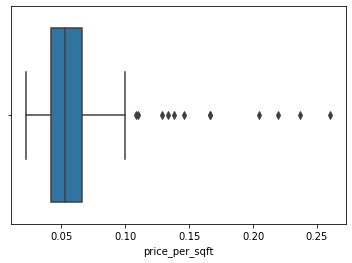

Dhayari Phata
AxesSubplot(0.125,0.125;0.775x0.755)


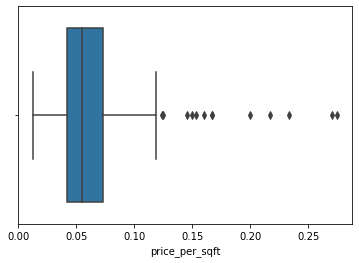

Dhole Patil Road
AxesSubplot(0.125,0.125;0.775x0.755)


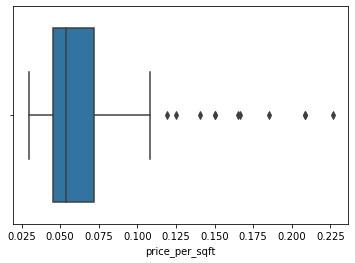

Erandwane
AxesSubplot(0.125,0.125;0.775x0.755)


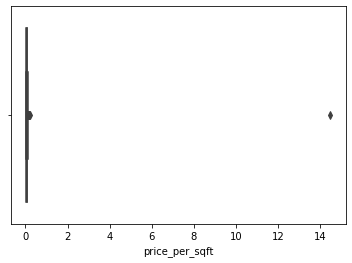

Fatima Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


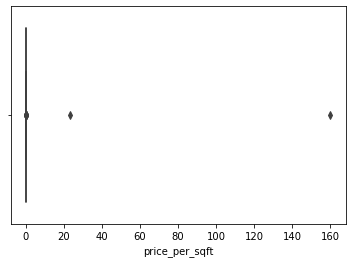

Fergusson College Road
AxesSubplot(0.125,0.125;0.775x0.755)


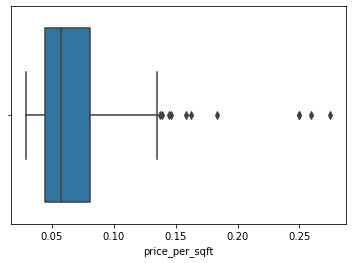

Ganesh Peth
AxesSubplot(0.125,0.125;0.775x0.755)


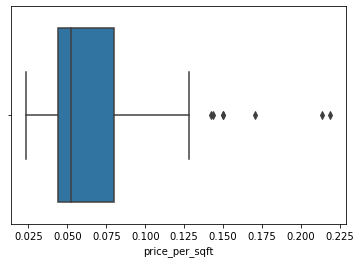

Ganeshkhind
AxesSubplot(0.125,0.125;0.775x0.755)


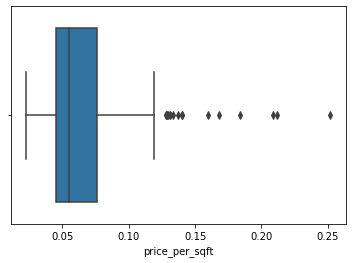

Ghorpade Peth
AxesSubplot(0.125,0.125;0.775x0.755)


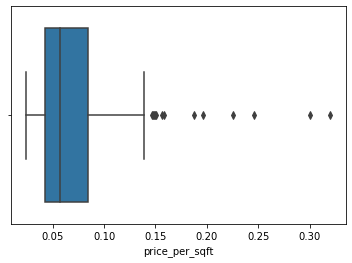

Ghorpadi
AxesSubplot(0.125,0.125;0.775x0.755)


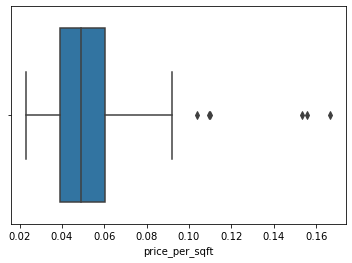

Gokhale Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


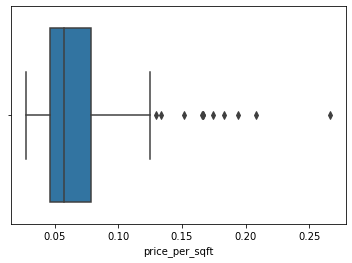

Gultekdi
AxesSubplot(0.125,0.125;0.775x0.755)


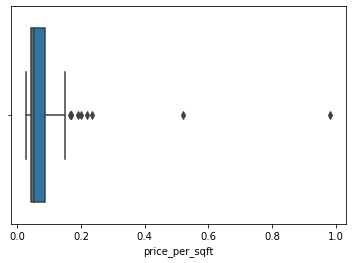

Guruwar peth
AxesSubplot(0.125,0.125;0.775x0.755)


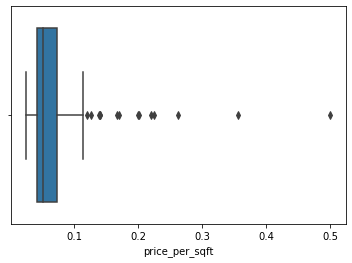

Hadapsar
AxesSubplot(0.125,0.125;0.775x0.755)


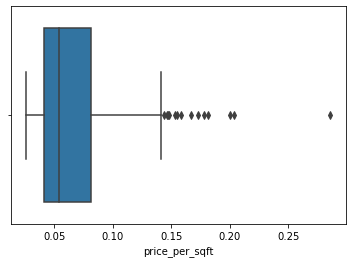

Hadapsar Industrial Estate
AxesSubplot(0.125,0.125;0.775x0.755)


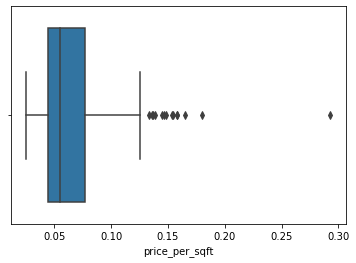

Hingne Khurd
AxesSubplot(0.125,0.125;0.775x0.755)


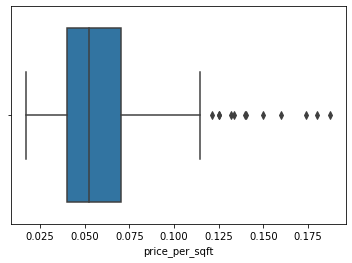

Jangali Maharaj Road
AxesSubplot(0.125,0.125;0.775x0.755)


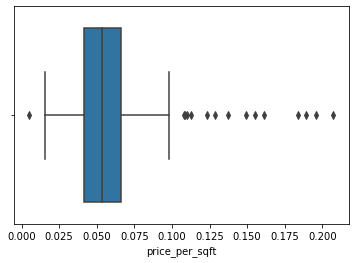

Kalyani Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


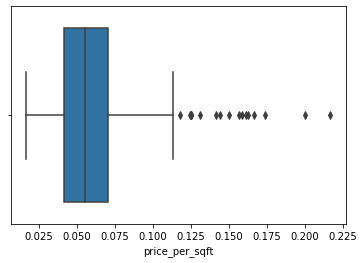

Karve Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


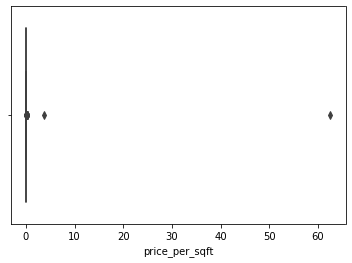

Karve Road
AxesSubplot(0.125,0.125;0.775x0.755)


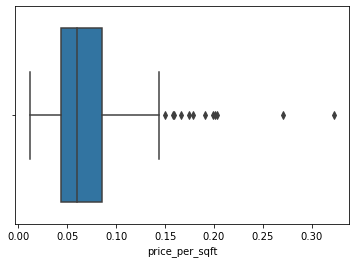

Kasba Peth
AxesSubplot(0.125,0.125;0.775x0.755)


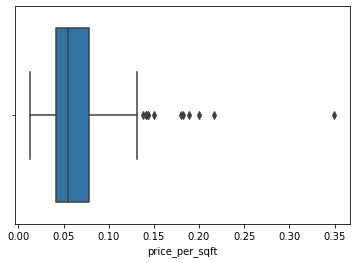

Katraj
AxesSubplot(0.125,0.125;0.775x0.755)


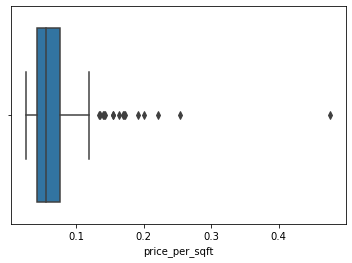

Khadaki
AxesSubplot(0.125,0.125;0.775x0.755)


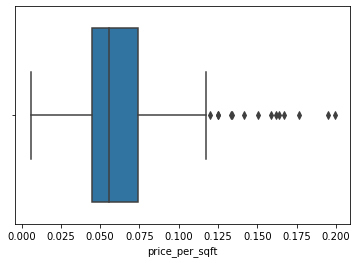

Khadki
AxesSubplot(0.125,0.125;0.775x0.755)


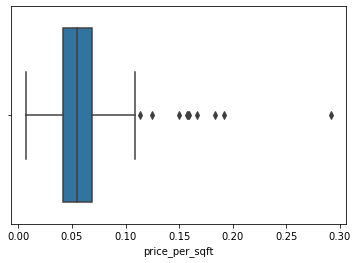

Kharadi
AxesSubplot(0.125,0.125;0.775x0.755)


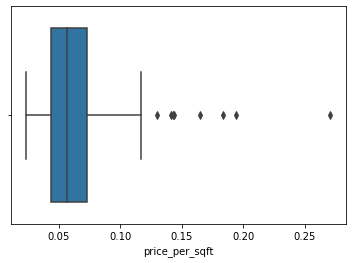

Kondhwa
AxesSubplot(0.125,0.125;0.775x0.755)


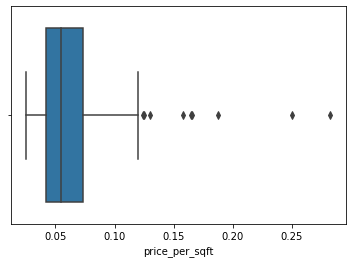

Kondhwa Budruk
AxesSubplot(0.125,0.125;0.775x0.755)


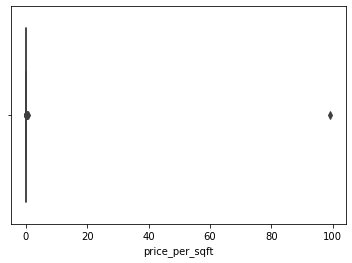

Kondhwa Khurd
AxesSubplot(0.125,0.125;0.775x0.755)


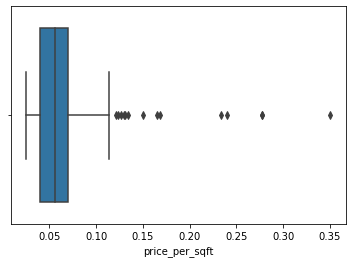

Koregaon Park
AxesSubplot(0.125,0.125;0.775x0.755)


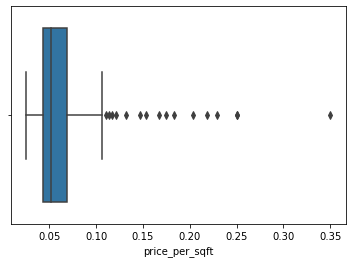

Kothrud
AxesSubplot(0.125,0.125;0.775x0.755)


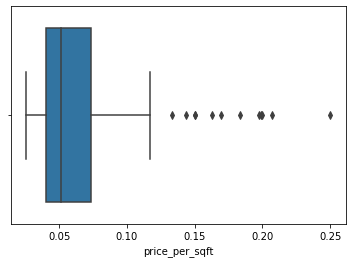

Law College Road
AxesSubplot(0.125,0.125;0.775x0.755)


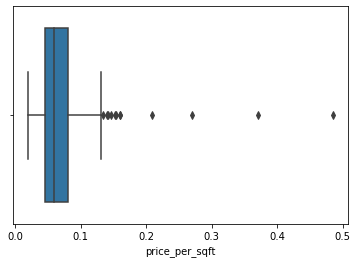

Laxmi Road
AxesSubplot(0.125,0.125;0.775x0.755)


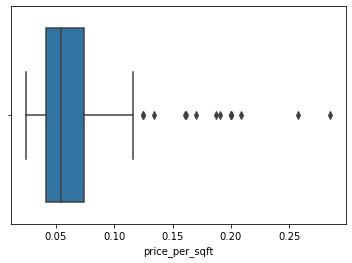

Lulla Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


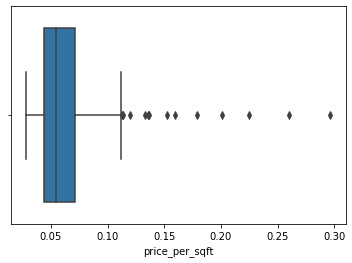

Mahatma Gandhi Road
AxesSubplot(0.125,0.125;0.775x0.755)


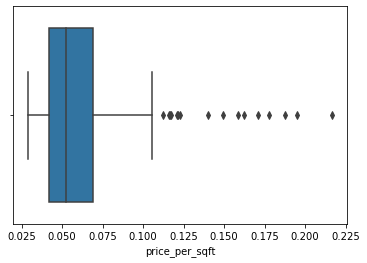

Mangalwar peth
AxesSubplot(0.125,0.125;0.775x0.755)


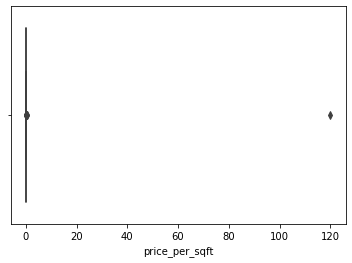

Manik Bagh
AxesSubplot(0.125,0.125;0.775x0.755)


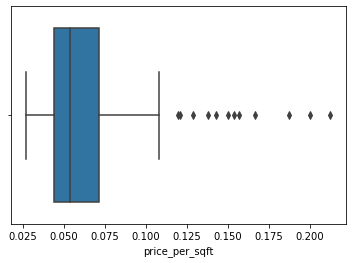

Market yard
AxesSubplot(0.125,0.125;0.775x0.755)


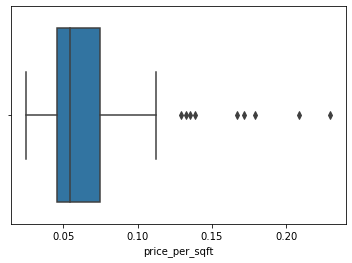

Model colony
AxesSubplot(0.125,0.125;0.775x0.755)


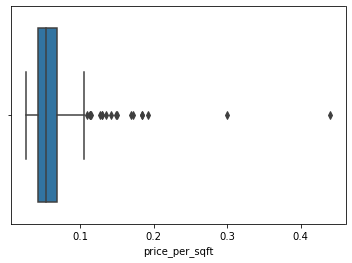

Mukund Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


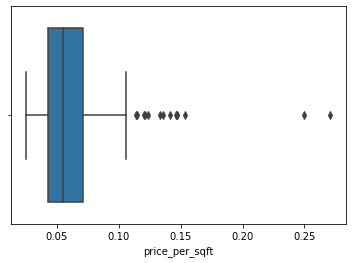

Mundhawa
AxesSubplot(0.125,0.125;0.775x0.755)


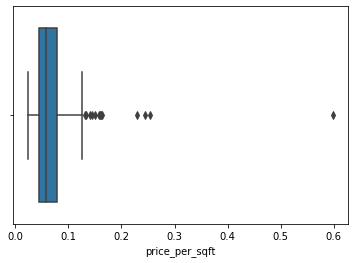

Nagar Road
AxesSubplot(0.125,0.125;0.775x0.755)


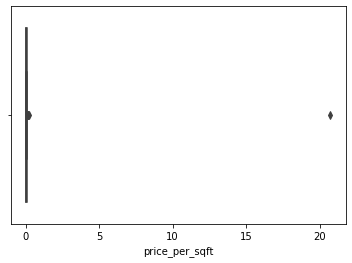

Nana Peth
AxesSubplot(0.125,0.125;0.775x0.755)


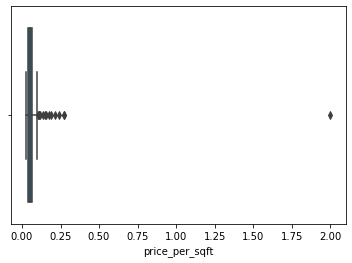

Narayan Peth
AxesSubplot(0.125,0.125;0.775x0.755)


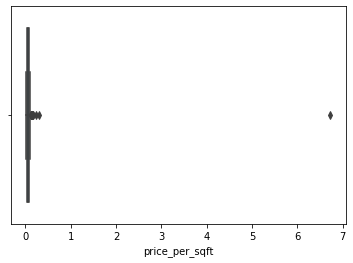

Narayangaon
AxesSubplot(0.125,0.125;0.775x0.755)


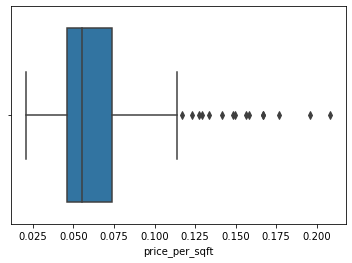

Navi Peth
AxesSubplot(0.125,0.125;0.775x0.755)


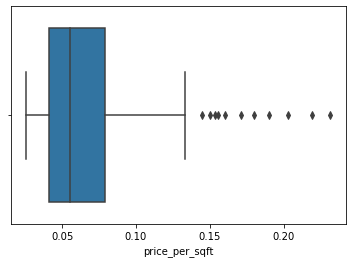

Padmavati
AxesSubplot(0.125,0.125;0.775x0.755)


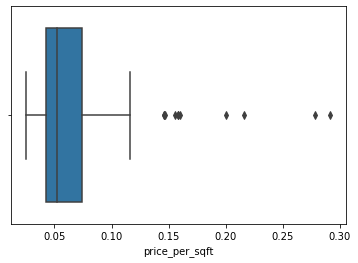

Parvati Darshan
AxesSubplot(0.125,0.125;0.775x0.755)


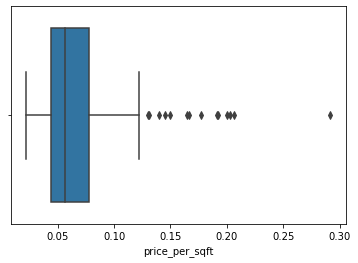

Pashan
AxesSubplot(0.125,0.125;0.775x0.755)


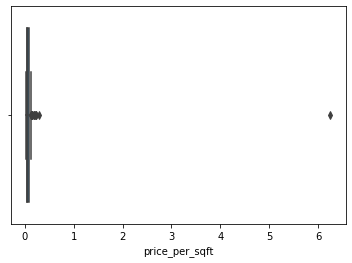

Paud Road
AxesSubplot(0.125,0.125;0.775x0.755)


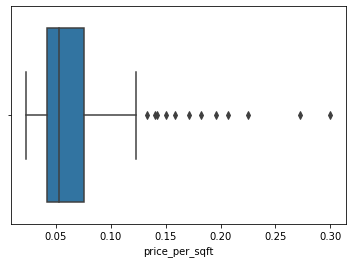

Pirangut
AxesSubplot(0.125,0.125;0.775x0.755)


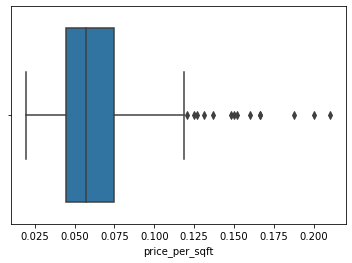

Prabhat Road
AxesSubplot(0.125,0.125;0.775x0.755)


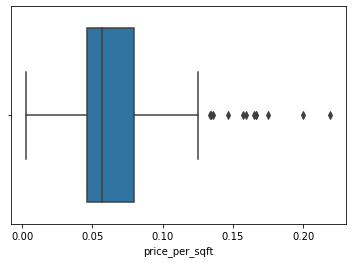

Pune Railway Station
AxesSubplot(0.125,0.125;0.775x0.755)


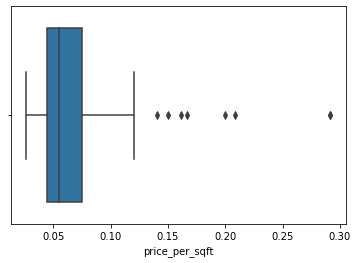

Rasta Peth
AxesSubplot(0.125,0.125;0.775x0.755)


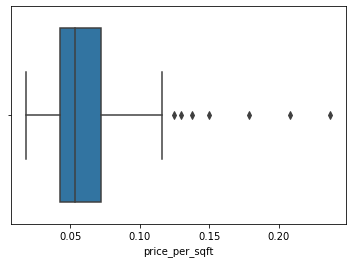

Raviwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


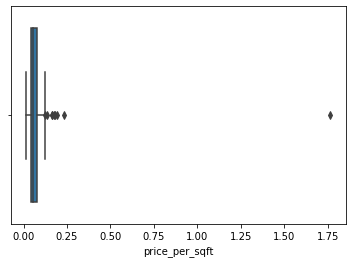

Sadashiv Peth
AxesSubplot(0.125,0.125;0.775x0.755)


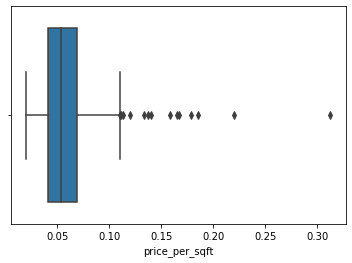

Sahakar Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


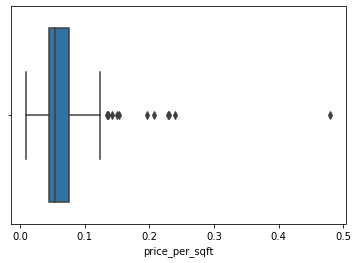

Salunke Vihar
AxesSubplot(0.125,0.125;0.775x0.755)


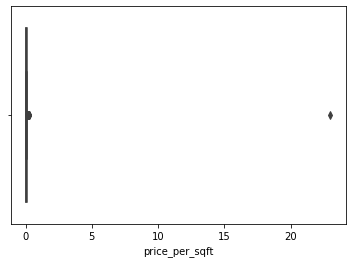

Sasson Road
AxesSubplot(0.125,0.125;0.775x0.755)


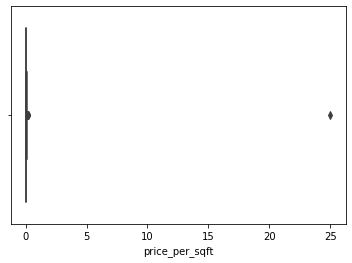

Satara Road
AxesSubplot(0.125,0.125;0.775x0.755)


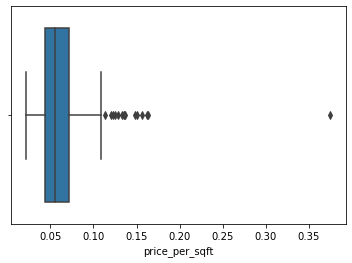

Senapati Bapat Road
AxesSubplot(0.125,0.125;0.775x0.755)


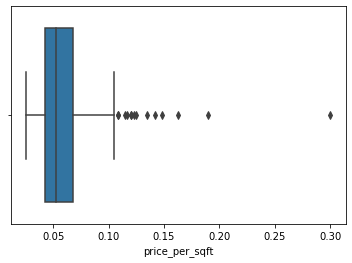

Shaniwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


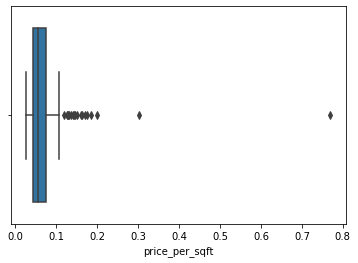

Shivaji Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


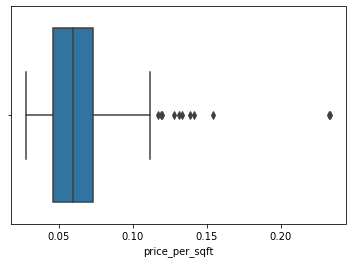

Shukrawar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


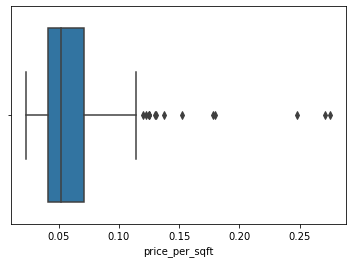

Sinhagad Road
AxesSubplot(0.125,0.125;0.775x0.755)


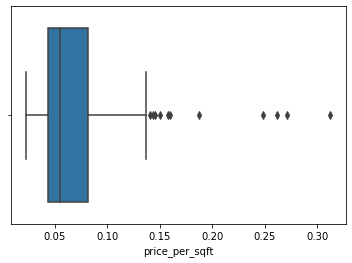

Somwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


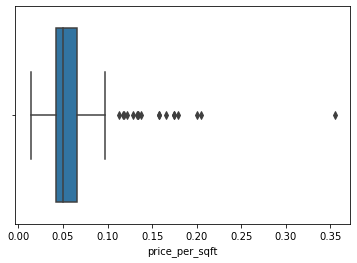

Swargate
AxesSubplot(0.125,0.125;0.775x0.755)


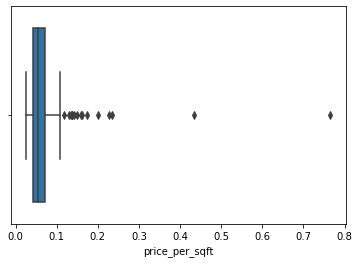

Tilak Road
AxesSubplot(0.125,0.125;0.775x0.755)


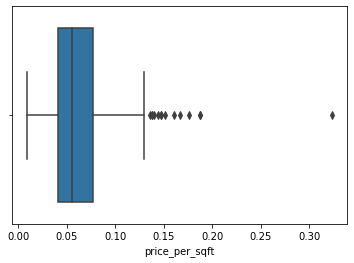

Uruli Devachi
AxesSubplot(0.125,0.125;0.775x0.755)


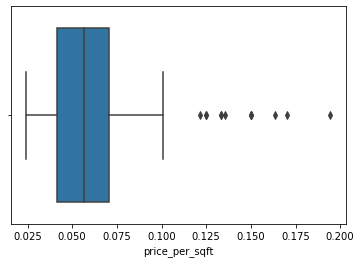

Vadgaon Budruk
AxesSubplot(0.125,0.125;0.775x0.755)


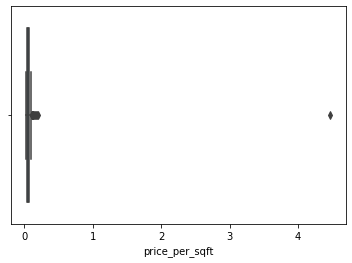

Viman Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


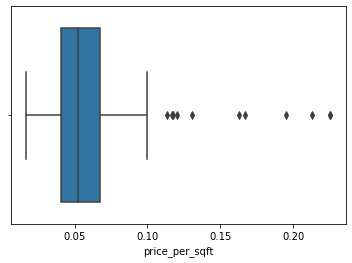

Vishrant Wadi
AxesSubplot(0.125,0.125;0.775x0.755)


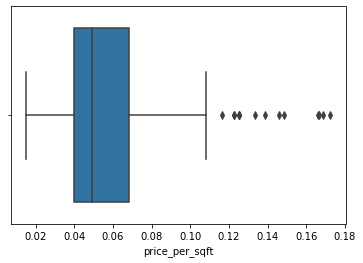

Wadgaon Sheri
AxesSubplot(0.125,0.125;0.775x0.755)


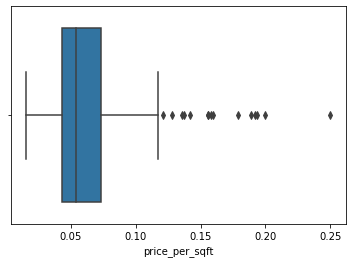

Wagholi
AxesSubplot(0.125,0.125;0.775x0.755)


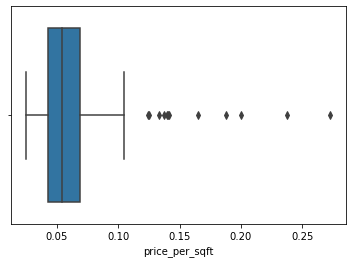

Wakadewadi
AxesSubplot(0.125,0.125;0.775x0.755)


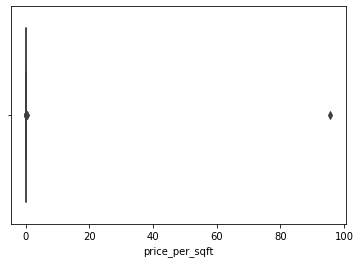

Wanowrie
AxesSubplot(0.125,0.125;0.775x0.755)


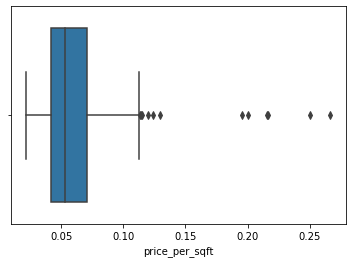

Warje
AxesSubplot(0.125,0.125;0.775x0.755)


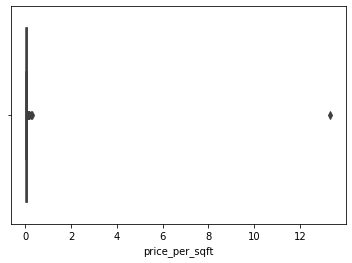

Yerawada
AxesSubplot(0.125,0.125;0.775x0.755)


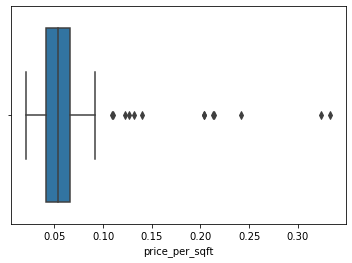

other
AxesSubplot(0.125,0.125;0.775x0.755)


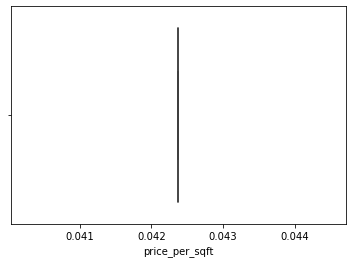

In [37]:
boxplot_n(df)

As we can see there are outliers in each area

In [38]:
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Super built-up Area,2,1056.0,2.0,1.0,39.07,Alandi Road,0.036998
1,Plot Area,4,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0.046154
2,Built-up Area,3,1440.0,2.0,3.0,62.00,Anandnagar,0.043056
3,Super built-up Area,3,1521.0,3.0,1.0,95.00,Aundh,0.062459
4,Super built-up Area,2,1200.0,2.0,1.0,51.00,Aundh Road,0.042500


In [39]:
df.shape

(13271, 8)

In [40]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        q1=subdf.price_per_sqft.quantile(0.85)
        q2=subdf.price_per_sqft.quantile(0.15)
        reduced_df=subdf[(subdf.price_per_sqft<q1) & (subdf.price_per_sqft>q2)]
        df_out=pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out
    

In [41]:
df2=remove_outliers(df)
df2

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Plot Area,4,2894.0,4.0,1.0,245.0,Alandi Road,0.084658
1,Super built-up Area,2,1084.0,2.0,2.0,50.0,Alandi Road,0.046125
2,Super built-up Area,2,1230.0,2.0,2.0,80.0,Alandi Road,0.065041
3,Super built-up Area,3,1750.0,3.0,2.0,130.0,Alandi Road,0.074286
4,Built-up Area,2,995.0,2.0,1.0,41.0,Alandi Road,0.041206
...,...,...,...,...,...,...,...,...
9222,Super built-up Area,2,1050.0,2.0,2.0,54.0,Yerawada,0.051429
9223,Built-up Area,2,970.0,2.0,0.0,45.0,Yerawada,0.046392
9224,Built-up Area,2,1140.0,2.0,1.0,57.0,Yerawada,0.050000
9225,Super built-up Area,3,1464.0,3.0,2.0,56.0,Yerawada,0.038251


Alandi Road
AxesSubplot(0.125,0.125;0.775x0.755)


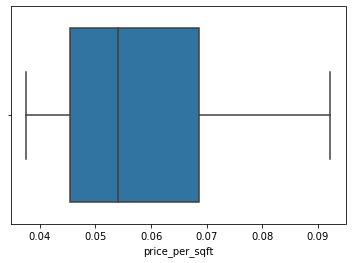

Ambegaon Budruk
AxesSubplot(0.125,0.125;0.775x0.755)


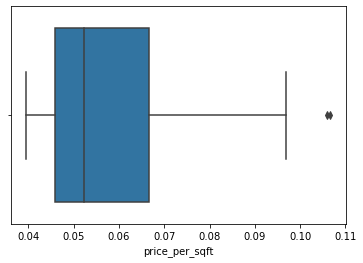

Anandnagar
AxesSubplot(0.125,0.125;0.775x0.755)


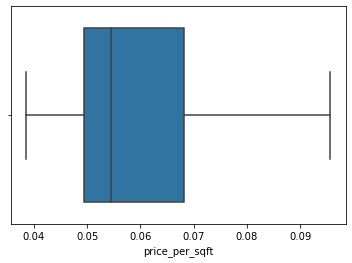

Aundh
AxesSubplot(0.125,0.125;0.775x0.755)


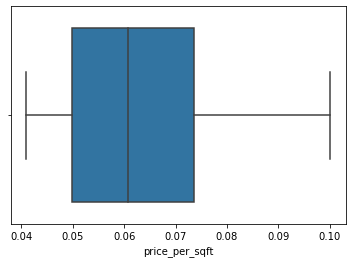

Aundh Road
AxesSubplot(0.125,0.125;0.775x0.755)


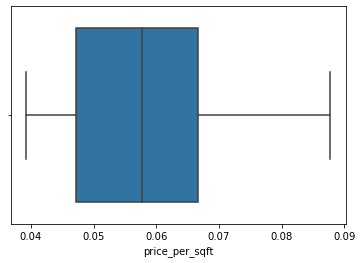

Balaji Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


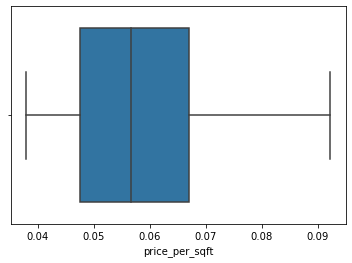

Baner
AxesSubplot(0.125,0.125;0.775x0.755)


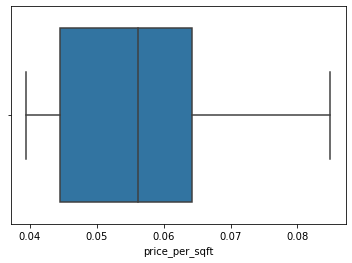

Baner road
AxesSubplot(0.125,0.125;0.775x0.755)


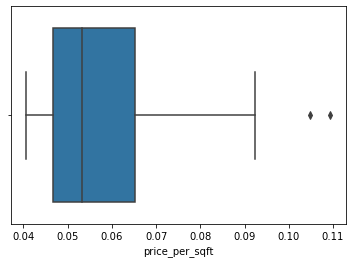

Bhandarkar Road
AxesSubplot(0.125,0.125;0.775x0.755)


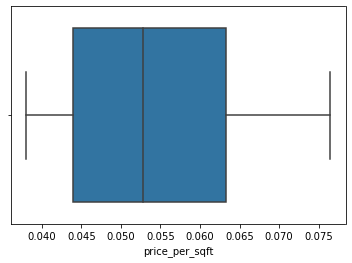

Bhavani Peth
AxesSubplot(0.125,0.125;0.775x0.755)


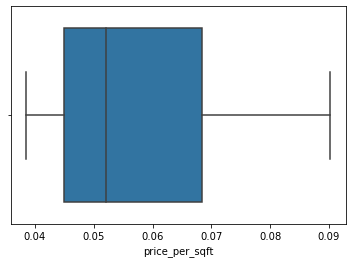

Bibvewadi
AxesSubplot(0.125,0.125;0.775x0.755)


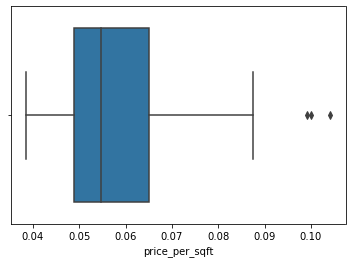

Bopodi
AxesSubplot(0.125,0.125;0.775x0.755)


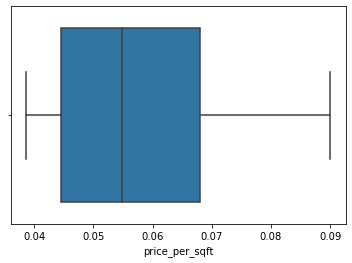

Budhwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


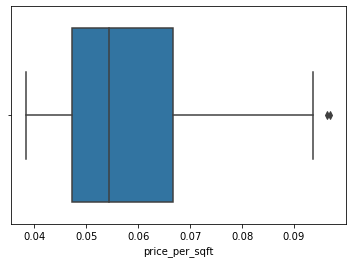

Bund Garden Road
AxesSubplot(0.125,0.125;0.775x0.755)


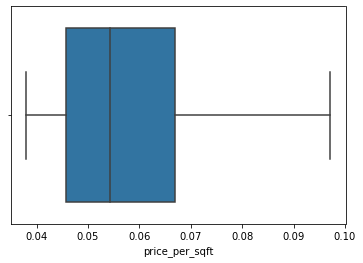

Camp
AxesSubplot(0.125,0.125;0.775x0.755)


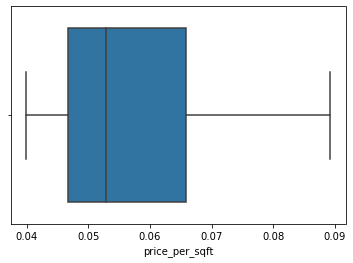

Chandan Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


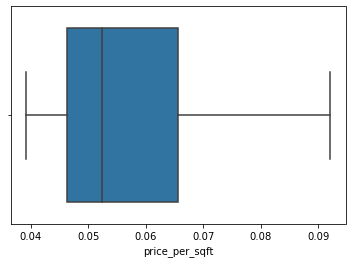

Dapodi
AxesSubplot(0.125,0.125;0.775x0.755)


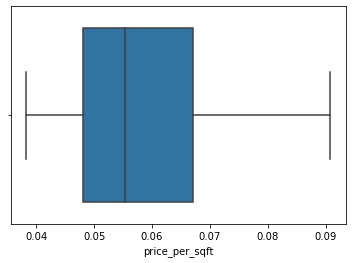

Deccan Gymkhana
AxesSubplot(0.125,0.125;0.775x0.755)


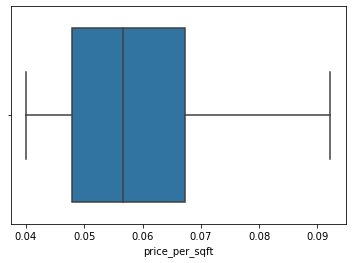

Dehu Road
AxesSubplot(0.125,0.125;0.775x0.755)


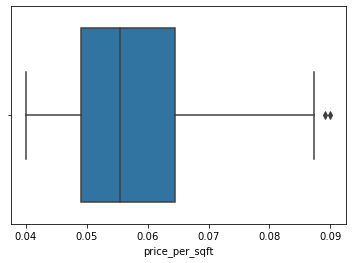

Dhankawadi
AxesSubplot(0.125,0.125;0.775x0.755)


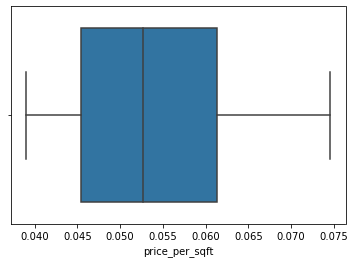

Dhayari Phata
AxesSubplot(0.125,0.125;0.775x0.755)


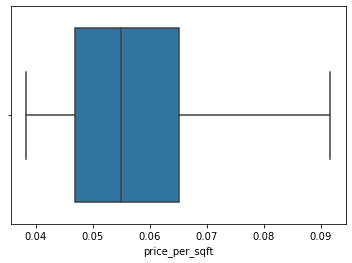

Dhole Patil Road
AxesSubplot(0.125,0.125;0.775x0.755)


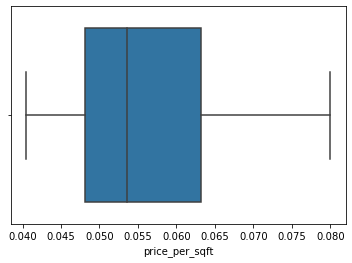

Erandwane
AxesSubplot(0.125,0.125;0.775x0.755)


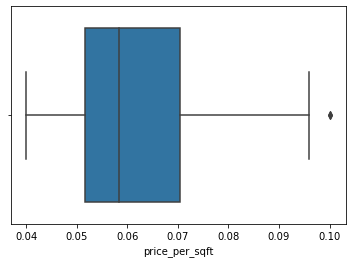

Fatima Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


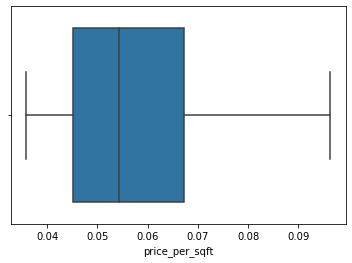

Fergusson College Road
AxesSubplot(0.125,0.125;0.775x0.755)


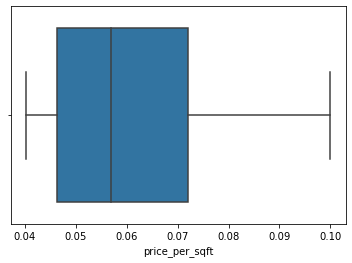

Ganesh Peth
AxesSubplot(0.125,0.125;0.775x0.755)


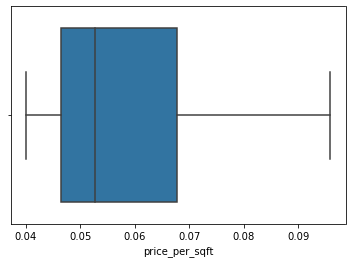

Ganeshkhind
AxesSubplot(0.125,0.125;0.775x0.755)


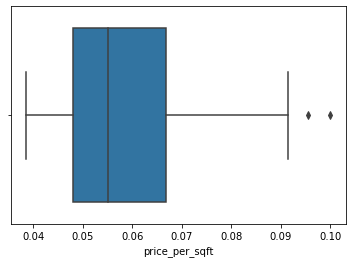

Ghorpade Peth
AxesSubplot(0.125,0.125;0.775x0.755)


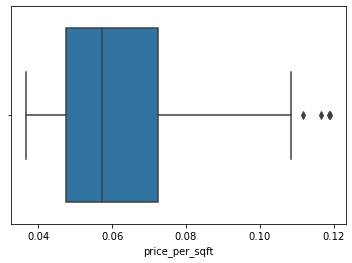

Ghorpadi
AxesSubplot(0.125,0.125;0.775x0.755)


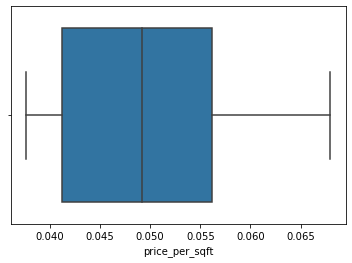

Gokhale Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


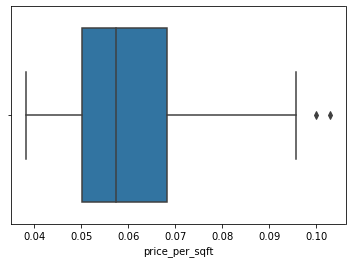

Gultekdi
AxesSubplot(0.125,0.125;0.775x0.755)


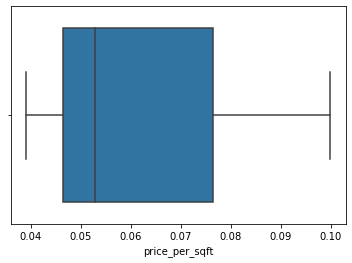

Guruwar peth
AxesSubplot(0.125,0.125;0.775x0.755)


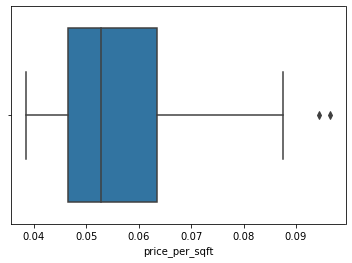

Hadapsar
AxesSubplot(0.125,0.125;0.775x0.755)


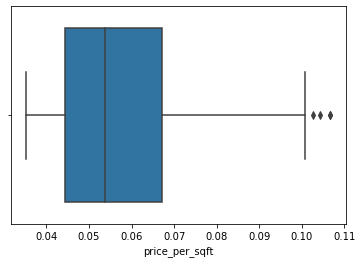

Hadapsar Industrial Estate
AxesSubplot(0.125,0.125;0.775x0.755)


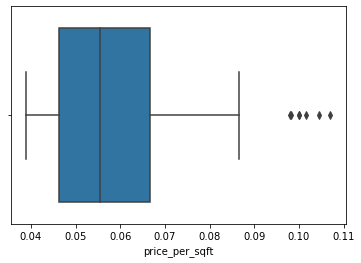

Hingne Khurd
AxesSubplot(0.125,0.125;0.775x0.755)


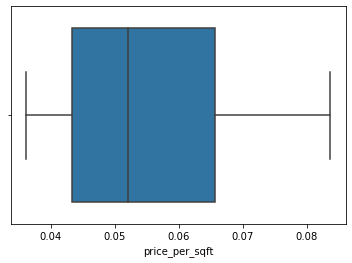

Jangali Maharaj Road
AxesSubplot(0.125,0.125;0.775x0.755)


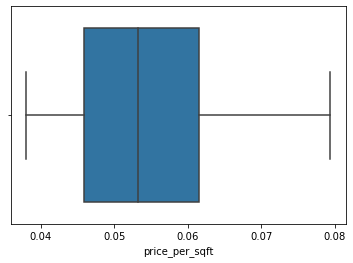

Kalyani Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


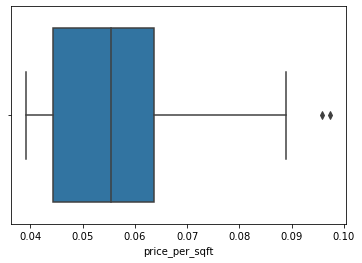

Karve Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


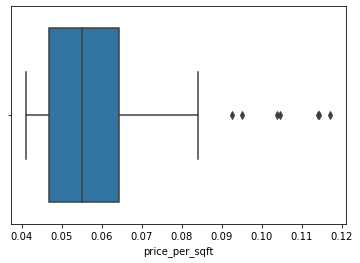

Karve Road
AxesSubplot(0.125,0.125;0.775x0.755)


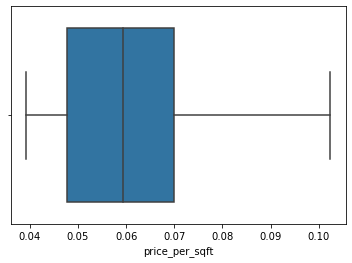

Kasba Peth
AxesSubplot(0.125,0.125;0.775x0.755)


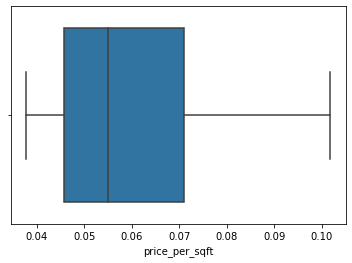

Katraj
AxesSubplot(0.125,0.125;0.775x0.755)


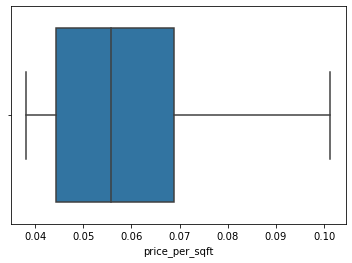

Khadaki
AxesSubplot(0.125,0.125;0.775x0.755)


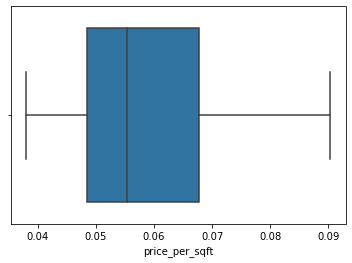

Khadki
AxesSubplot(0.125,0.125;0.775x0.755)


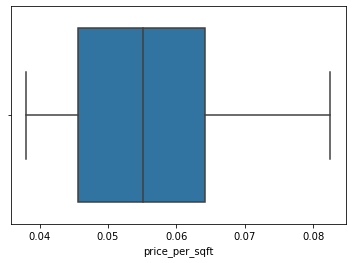

Kharadi
AxesSubplot(0.125,0.125;0.775x0.755)


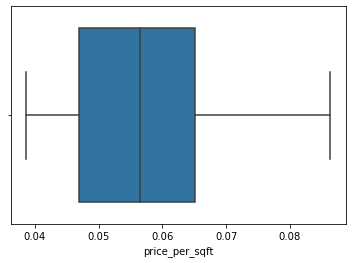

Kondhwa
AxesSubplot(0.125,0.125;0.775x0.755)


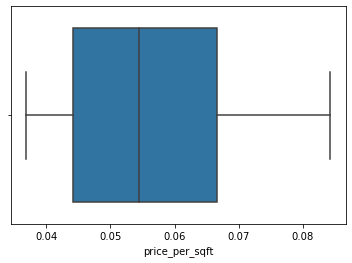

Kondhwa Budruk
AxesSubplot(0.125,0.125;0.775x0.755)


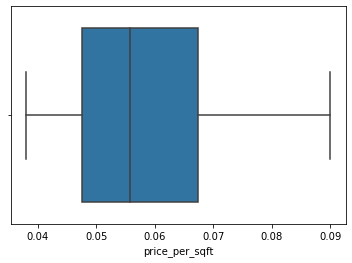

Kondhwa Khurd
AxesSubplot(0.125,0.125;0.775x0.755)


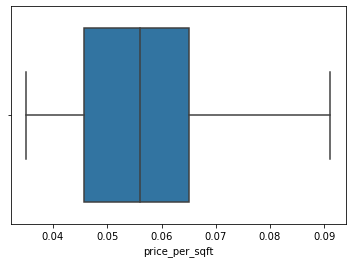

Koregaon Park
AxesSubplot(0.125,0.125;0.775x0.755)


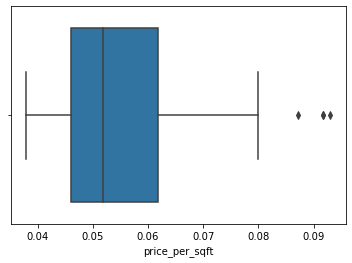

Kothrud
AxesSubplot(0.125,0.125;0.775x0.755)


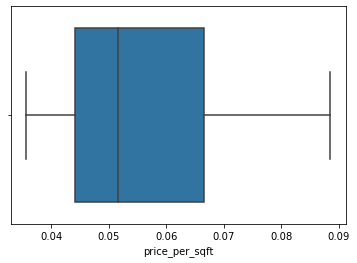

Law College Road
AxesSubplot(0.125,0.125;0.775x0.755)


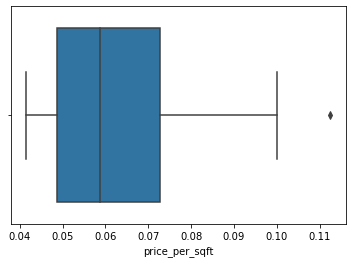

Laxmi Road
AxesSubplot(0.125,0.125;0.775x0.755)


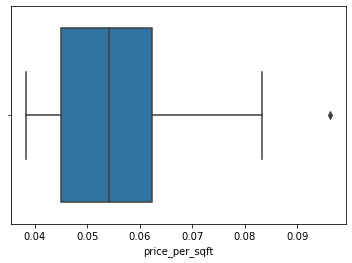

Lulla Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


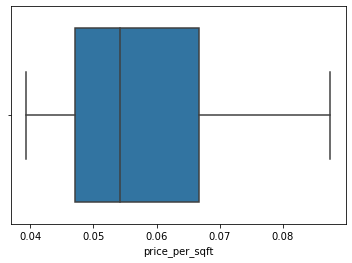

Mahatma Gandhi Road
AxesSubplot(0.125,0.125;0.775x0.755)


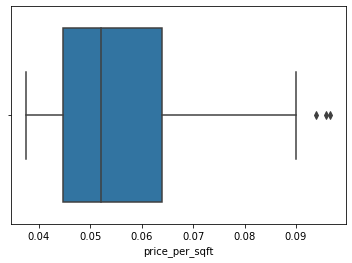

Mangalwar peth
AxesSubplot(0.125,0.125;0.775x0.755)


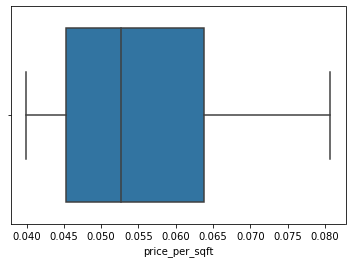

Manik Bagh
AxesSubplot(0.125,0.125;0.775x0.755)


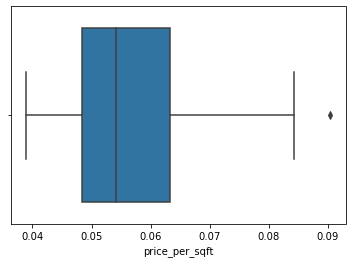

Market yard
AxesSubplot(0.125,0.125;0.775x0.755)


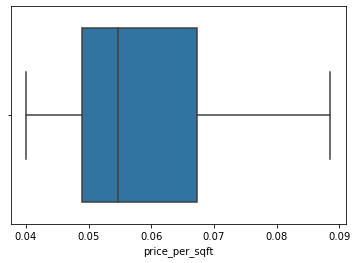

Model colony
AxesSubplot(0.125,0.125;0.775x0.755)


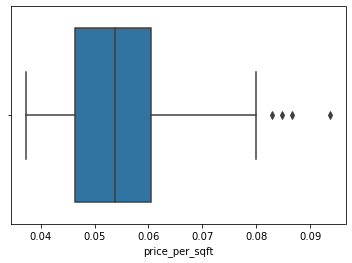

Mukund Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


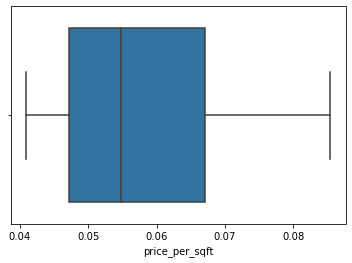

Mundhawa
AxesSubplot(0.125,0.125;0.775x0.755)


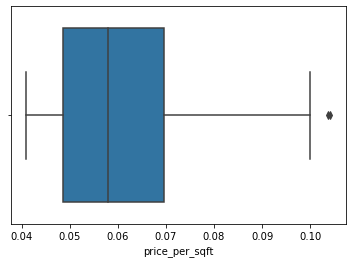

Nagar Road
AxesSubplot(0.125,0.125;0.775x0.755)


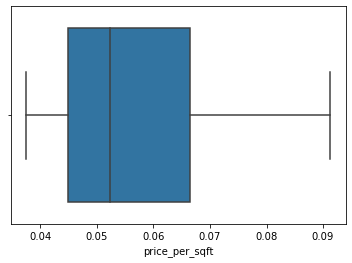

Nana Peth
AxesSubplot(0.125,0.125;0.775x0.755)


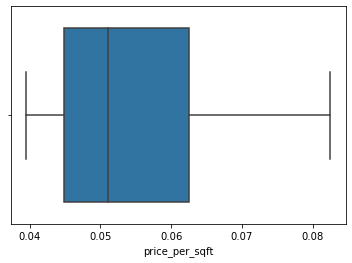

Narayan Peth
AxesSubplot(0.125,0.125;0.775x0.755)


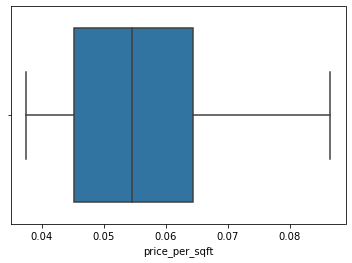

Narayangaon
AxesSubplot(0.125,0.125;0.775x0.755)


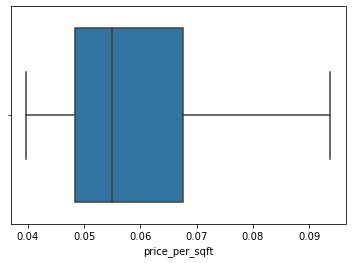

Navi Peth
AxesSubplot(0.125,0.125;0.775x0.755)


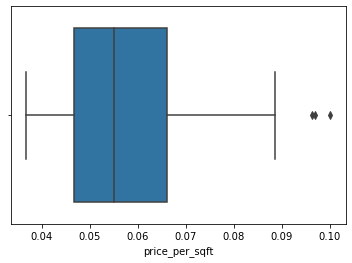

Padmavati
AxesSubplot(0.125,0.125;0.775x0.755)


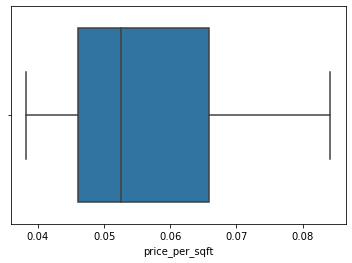

Parvati Darshan
AxesSubplot(0.125,0.125;0.775x0.755)


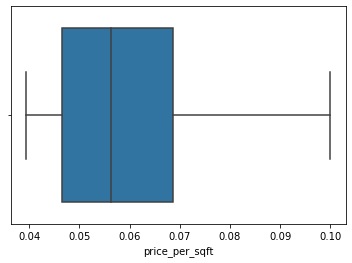

Pashan
AxesSubplot(0.125,0.125;0.775x0.755)


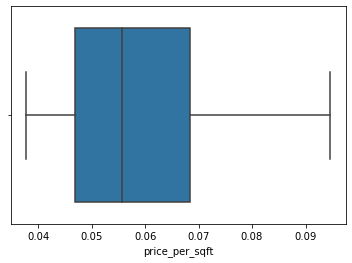

Paud Road
AxesSubplot(0.125,0.125;0.775x0.755)


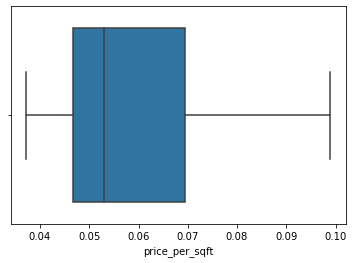

Pirangut
AxesSubplot(0.125,0.125;0.775x0.755)


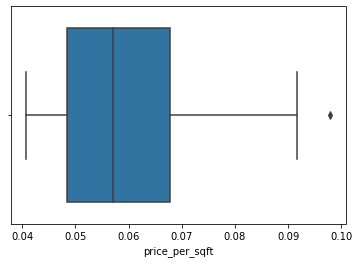

Prabhat Road
AxesSubplot(0.125,0.125;0.775x0.755)


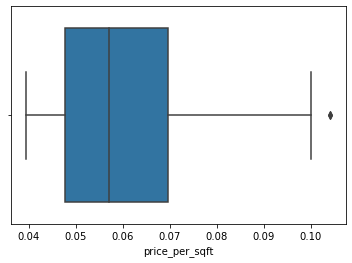

Pune Railway Station
AxesSubplot(0.125,0.125;0.775x0.755)


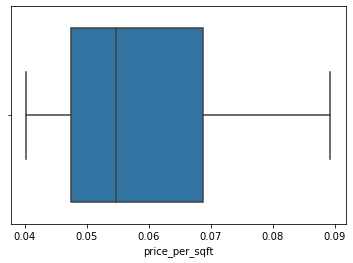

Rasta Peth
AxesSubplot(0.125,0.125;0.775x0.755)


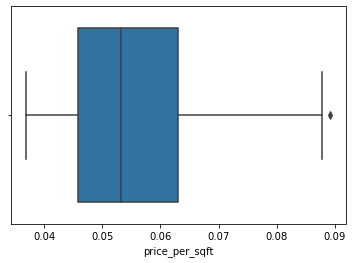

Raviwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


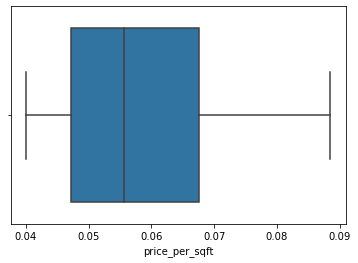

Sadashiv Peth
AxesSubplot(0.125,0.125;0.775x0.755)


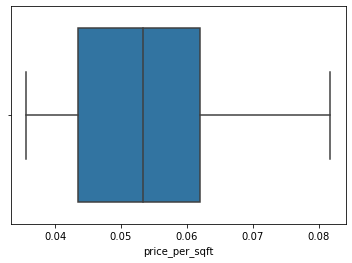

Sahakar Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


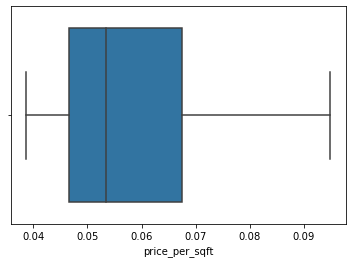

Salunke Vihar
AxesSubplot(0.125,0.125;0.775x0.755)


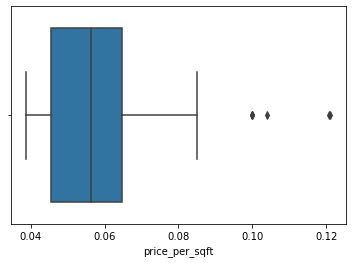

Sasson Road
AxesSubplot(0.125,0.125;0.775x0.755)


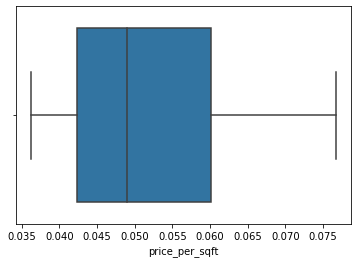

Satara Road
AxesSubplot(0.125,0.125;0.775x0.755)


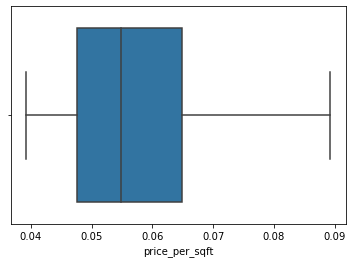

Senapati Bapat Road
AxesSubplot(0.125,0.125;0.775x0.755)


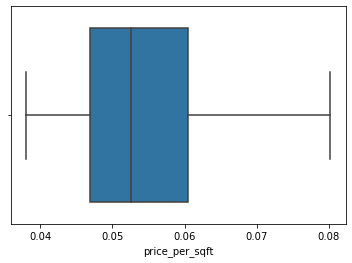

Shaniwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


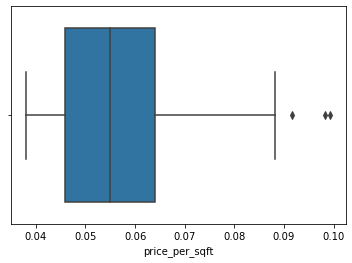

Shivaji Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


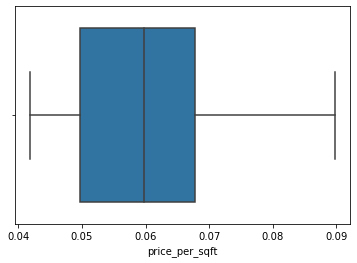

Shukrawar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


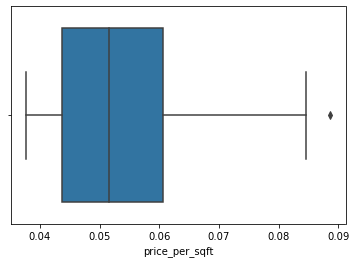

Sinhagad Road
AxesSubplot(0.125,0.125;0.775x0.755)


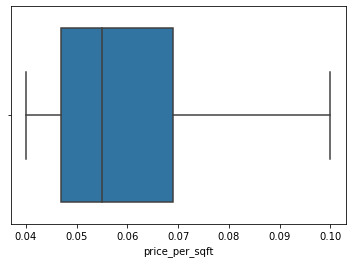

Somwar Peth
AxesSubplot(0.125,0.125;0.775x0.755)


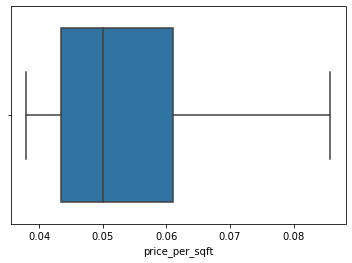

Swargate
AxesSubplot(0.125,0.125;0.775x0.755)


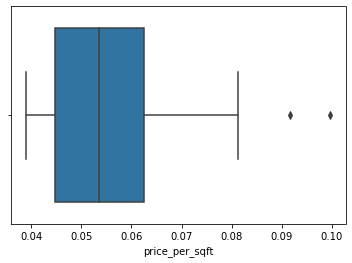

Tilak Road
AxesSubplot(0.125,0.125;0.775x0.755)


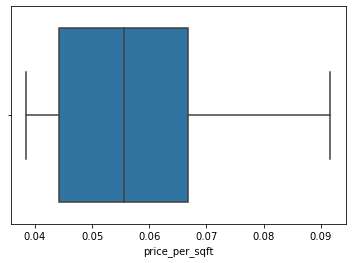

Uruli Devachi
AxesSubplot(0.125,0.125;0.775x0.755)


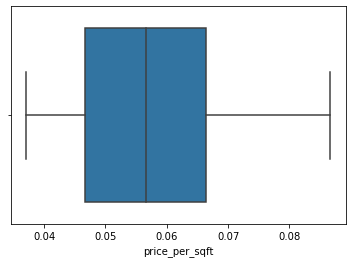

Vadgaon Budruk
AxesSubplot(0.125,0.125;0.775x0.755)


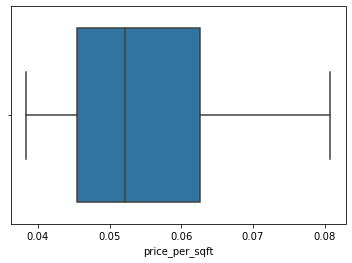

Viman Nagar
AxesSubplot(0.125,0.125;0.775x0.755)


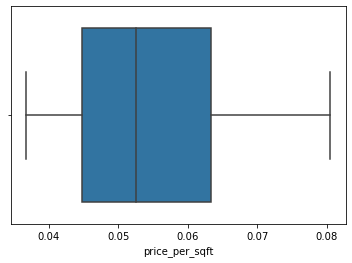

Vishrant Wadi
AxesSubplot(0.125,0.125;0.775x0.755)


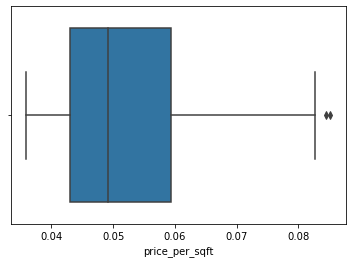

Wadgaon Sheri
AxesSubplot(0.125,0.125;0.775x0.755)


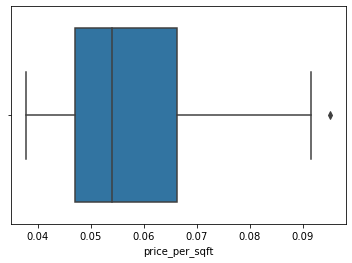

Wagholi
AxesSubplot(0.125,0.125;0.775x0.755)


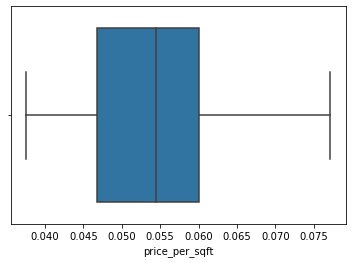

Wakadewadi
AxesSubplot(0.125,0.125;0.775x0.755)


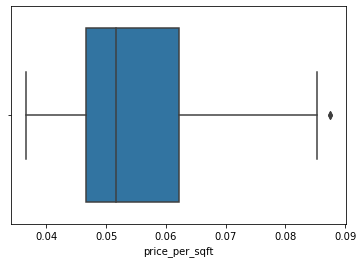

Wanowrie
AxesSubplot(0.125,0.125;0.775x0.755)


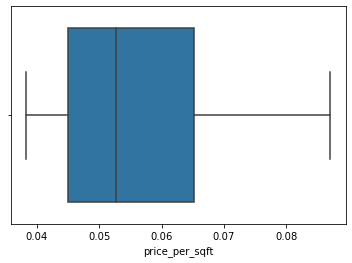

Warje
AxesSubplot(0.125,0.125;0.775x0.755)


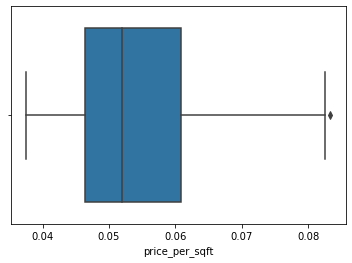

Yerawada
AxesSubplot(0.125,0.125;0.775x0.755)


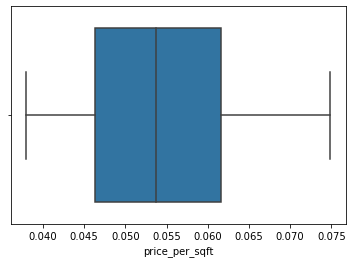

In [42]:
boxplot_n(df2)

we have removed ouliers of price per sqft

In [43]:
df['baths_per_size']=df.bath/df.bath
df.head()

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft,baths_per_size
0,Super built-up Area,2,1056.0,2.0,1.0,39.07,Alandi Road,0.036998,1.0
1,Plot Area,4,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0.046154,1.0
2,Built-up Area,3,1440.0,2.0,3.0,62.00,Anandnagar,0.043056,1.0
3,Super built-up Area,3,1521.0,3.0,1.0,95.00,Aundh,0.062459,1.0
4,Super built-up Area,2,1200.0,2.0,1.0,51.00,Aundh Road,0.042500,1.0


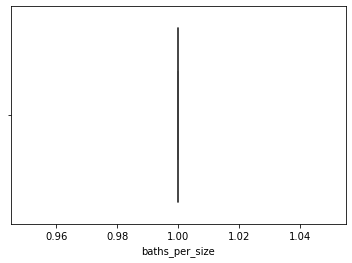

In [44]:
sns.boxplot(x=df.baths_per_size, data=df)
plt.show()

 there no errors in the baths to size 

In [45]:
df2.head()

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Plot Area,4,2894.0,4.0,1.0,245.0,Alandi Road,0.084658
1,Super built-up Area,2,1084.0,2.0,2.0,50.0,Alandi Road,0.046125
2,Super built-up Area,2,1230.0,2.0,2.0,80.0,Alandi Road,0.065041
3,Super built-up Area,3,1750.0,3.0,2.0,130.0,Alandi Road,0.074286
4,Built-up Area,2,995.0,2.0,1.0,41.0,Alandi Road,0.041206


In [46]:
df2.shape

(9227, 8)

now we have to convert categorical data to numerical data

In [47]:
df.site_location.unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

<Figure size 14400x7200 with 0 Axes>

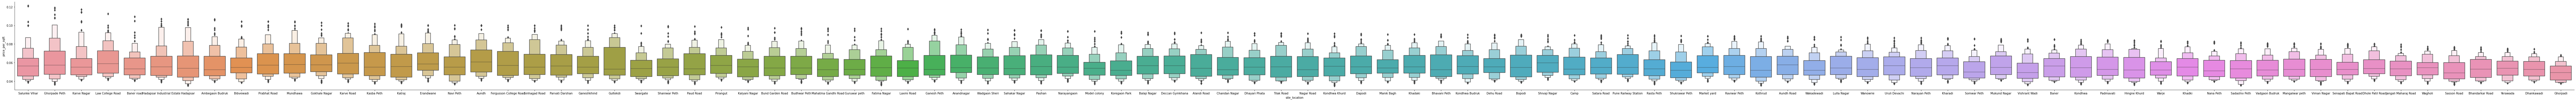

In [48]:
plt.figure(figsize=(200, 100))
sns.catplot(y="price_per_sqft", x="site_location", data=df2.sort_values("price_per_sqft", ascending=False), kind="boxen",height=5,aspect=25)

In [49]:
df2.sort_values("price_per_sqft", ascending=False)

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft
7288,Super built-up Area,3,2560.0,4.0,0.0,310.00,Salunke Vihar,0.121094
7306,Plot Area,8,1200.0,8.0,0.0,145.00,Salunke Vihar,0.120833
2645,Plot Area,4,1050.0,3.0,2.0,125.00,Ghorpade Peth,0.119048
2678,Built-up Area,2,800.0,1.0,3.0,95.00,Ghorpade Peth,0.118750
3618,Plot Area,5,2297.0,5.0,2.0,269.00,Karve Nagar,0.117109
...,...,...,...,...,...,...,...,...
3163,Super built-up Area,2,1195.0,2.0,0.0,42.40,Hadapsar,0.035481
3168,Super built-up Area,3,1275.0,3.0,2.0,45.00,Hadapsar,0.035294
4504,Super built-up Area,2,1090.0,2.0,2.0,38.37,Kondhwa Khurd,0.035202
3156,Built-up Area,2,1080.0,2.0,1.0,38.00,Hadapsar,0.035185


In [50]:
g=df2.groupby('site_location')
g.max().sort_values('price_per_sqft',ascending=False)

,area_type,size,total_sqft,bath,balcony,price,price_per_sqft
site_location,,,,,,,
Salunke Vihar,Super built-up Area,11,5000.0,9.0,3.0,425.0,0.121094
Ghorpade Peth,Super built-up Area,6,11338.0,119880.0,3.0,1000.0,0.119048
Karve Nagar,Super built-up Area,7,7000.0,8.0,3.0,450.0,0.117109
Law College Road,Super built-up Area,8,5000.0,8.0,3.0,310.0,0.112500
Baner road,Super built-up Area,9,4800.0,8.0,3.0,525.0,0.109375
...,...,...,...,...,...,...,...
Sasson Road,Super built-up Area,7,3200.0,7.0,3.0,204.0,0.076665
Bhandarkar Road,Super built-up Area,7,5000.0,119880.0,3.0,299.0,0.076471
Yerawada,Super built-up Area,7,4200.0,5.0,3.0,250.0,0.074873


In [51]:
df2_a= pd.get_dummies(df2.area_type, drop_first=True )
df2_a

,Carpet Area,Plot Area,Super built-up Area
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
9222,0,0,1
9223,0,0,0
9224,0,0,0
9225,0,0,1


In [52]:
df2_s= pd.get_dummies(df2.site_location, drop_first=True )
df2_s

,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,Bibvewadi,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:

x=pd.concat([df2,df2_a,df2_s], axis=1)
x

,area_type,size,total_sqft,bath,balcony,price,site_location,price_per_sqft,Carpet Area,Plot Area,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Plot Area,4,2894.0,4.0,1.0,245.0,Alandi Road,0.084658,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,2,1084.0,2.0,2.0,50.0,Alandi Road,0.046125,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,2,1230.0,2.0,2.0,80.0,Alandi Road,0.065041,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,3,1750.0,3.0,2.0,130.0,Alandi Road,0.074286,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Built-up Area,2,995.0,2.0,1.0,41.0,Alandi Road,0.041206,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,Super built-up Area,2,1050.0,2.0,2.0,54.0,Yerawada,0.051429,0,0,...,0,0,0,0,0,0,0,0,0,1
9223,Built-up Area,2,970.0,2.0,0.0,45.0,Yerawada,0.046392,0,0,...,0,0,0,0,0,0,0,0,0,1
9224,Built-up Area,2,1140.0,2.0,1.0,57.0,Yerawada,0.050000,0,0,...,0,0,0,0,0,0,0,0,0,1
9225,Super built-up Area,3,1464.0,3.0,2.0,56.0,Yerawada,0.038251,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
y=x.price
x=x.drop(['price','area_type','site_location','price_per_sqft'], axis=1)
x.head()

,size,total_sqft,bath,balcony,Carpet Area,Plot Area,Super built-up Area,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,4,2894.0,4.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1084.0,2.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1230.0,2.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1750.0,3.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,995.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x

,size,total_sqft,bath,balcony,Carpet Area,Plot Area,Super built-up Area,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,4,2894.0,4.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1084.0,2.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1230.0,2.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1750.0,3.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,995.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,2,1050.0,2.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9223,2,970.0,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9224,2,1140.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9225,3,1464.0,3.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
x.describe()

,size,total_sqft,bath,balcony,Carpet Area,Plot Area,Super built-up Area,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
count,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,...,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000
mean,2.628698,1510.816238,665.121816,1.536469,0.007045,0.082475,0.725371,0.010513,0.010513,0.010187,...,0.010296,0.010404,0.010187,0.010404,0.010404,0.010404,0.010296,0.010404,0.010296,0.010296
std,0.954068,872.294611,8888.170622,0.845057,0.083640,0.275102,0.446351,0.101996,0.101996,0.100423,...,0.100950,0.101475,0.100423,0.101475,0.101475,0.101475,0.100950,0.101475,0.100950,0.100950
min,1.000000,276.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1120.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1303.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1662.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,30400.000000,119880.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y

0       245.0
1        50.0
2        80.0
3       130.0
4        41.0
        ...  
9222     54.0
9223     45.0
9224     57.0
9225     56.0
9226     70.0
Name: price, Length: 9227, dtype: float64

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

In [116]:
model.fit(x_train,y_train)

LinearRegression()

In [117]:
model.score(x_test,y_test)

0.864379104845482